**IRIS FLOWER CLASSIFICATION**

**Task 3 : Problem Statement**

1.The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements.Now imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

2.Use the Iris dataset to develop a model that can classify iris flowers into different speccies based on their and petal measurements. This dataset is widely used for introductory classification tasks.

In [36]:
# Importing the required libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Loading the dataset

iris=pd.read_csv('/content/IRIS.csv')


In [4]:
#Showing first 5 rows of dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Getting information about data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# checking null values

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Getting statstical data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# to display number of samples on each class

iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Sepal length')

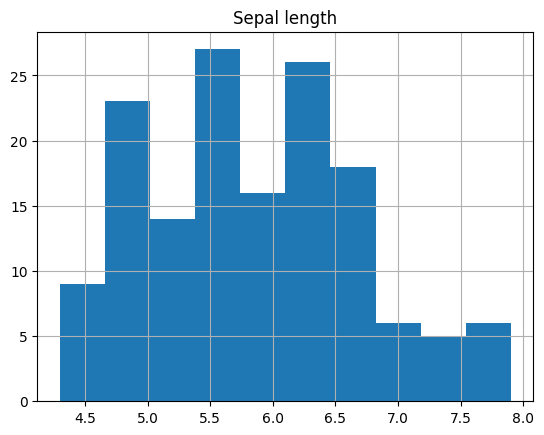

In [12]:
# Visual representation

iris['sepal_length'].hist()
plt.title('Sepal length')

Text(0.5, 1.0, 'Sepal width')

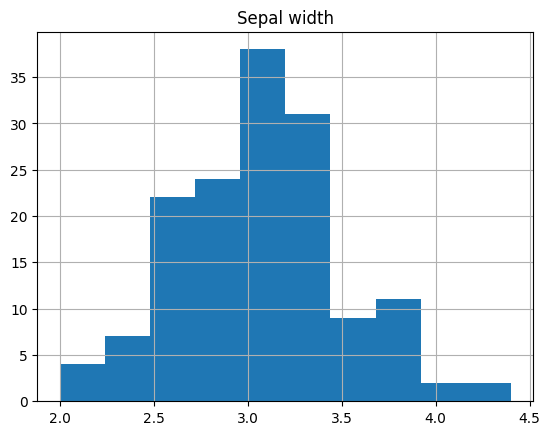

In [13]:
iris['sepal_width'].hist()
plt.title('Sepal width')

Text(0.5, 1.0, 'petal_length')

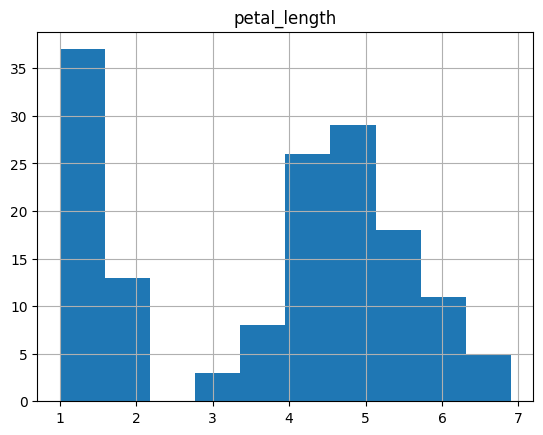

In [14]:
iris['petal_length'].hist()
plt.title('petal_length')

Text(0.5, 1.0, 'petal_width')

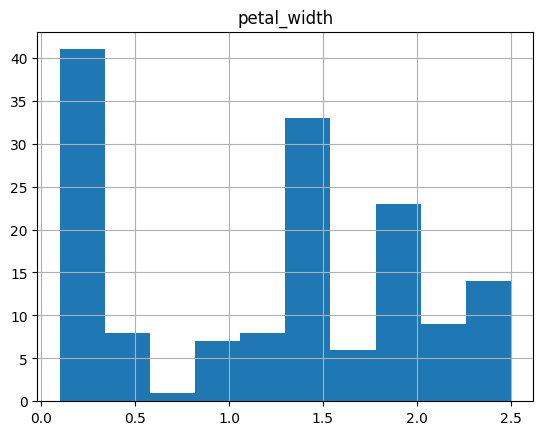

In [15]:
iris['petal_width'].hist()
plt.title('petal_width')

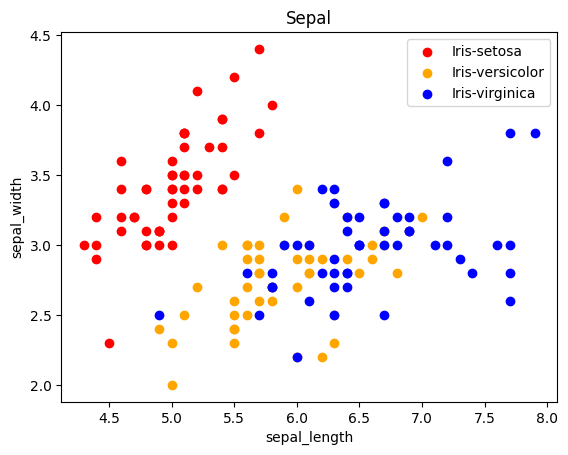

In [17]:
# Scatter plot
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal')
plt.legend()

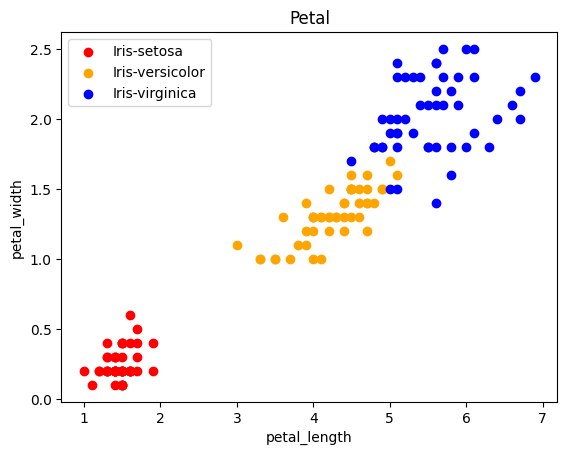

In [18]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Petal')
plt.legend()

In [19]:
# coorelation matrix
iris.corr()

<ipython-input-19-73d8171541a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-20-2d1057e86cbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr=iris.corr()


<Axes: >

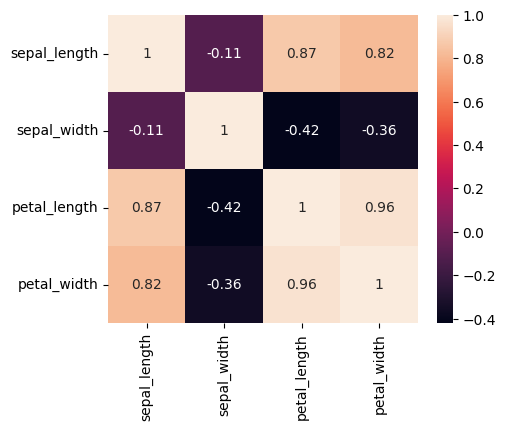

In [20]:
Corr=iris.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(Corr, annot=True, ax=ax)

In [21]:
# Label Encoder

le=LabelEncoder()

In [22]:
iris['species']=le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:


X=iris.drop(columns=['species'])
Y=iris['species']

**Split into train and test data**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


**Model training**

In [26]:
model=KNeighborsClassifier()

In [27]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

**Model Evaluation**

In [28]:
# accuracy on training data

X_train_prediction=model.predict(X_train)

In [29]:
print(X_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 1 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 2 0]


In [30]:
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)

print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy score of training data :95.83%


In [31]:
# Accuracy on test data

X_test_prediction =model.predict(X_test)

In [32]:
print(X_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2]


In [33]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)

print('Accuracy score of testing data :{:.2f}%'.format(testing_data_accuracy*100 ))

Accuracy score of testing data :100.00%


**Classification Report **: It consists of precision, recall, F1 score

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.metrics import classification_report

In [39]:
confusion_matrix(Y_test,X_test_prediction)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]])

In [40]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Conclusion**

The KNN(K- Nearest Neighbors) algorithm is simple yet effective classification method.It predicts the class label of new data point with full accuracy. This model is effective for given Iris flower dataset